In [1]:
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib notebook

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def F1(x, y):
    """
    F1 is a multi-variable function.
    
    Parameters
    ----------
    x : int or float
        x value of the function.
    y : int or float
        y value of the function.
    
    Returns
    -------
    res : double
        The function evaluated at (x,y)
    """
    res = x**4 + y**4 - 15
    return res

In [3]:
def F2(x, y):
    """
    F1 is a multi-variable function.
    
    Parameters
    ----------
    x : int or float
        x value of the function.
    y : int or float
        y value of the function.
    
    Returns
    -------
    res : double
        The function evaluated at (x,y)
    """
    RRR = 1.464
    res = x**3*y - x*y**3 - y/2. - RRR
    return res

In [4]:
x = sp.linspace(-3, 3, 300)
y = sp.linspace(-2, 2, 200)
levels = [0]
X, Y = sp.meshgrid(x, y)
Z1 = F1(X, Y)
Z2 = F2(X, Y)

<IPython.core.display.Javascript object>


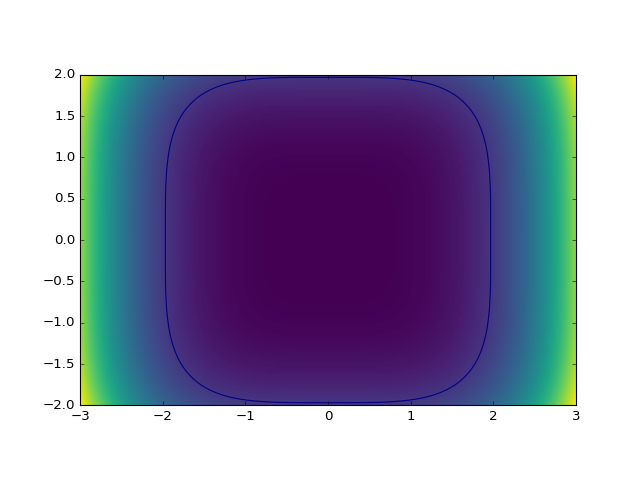

In [5]:
plt.imshow(Z1, origin='lower', cmap=cm.viridis, extent=(-3, 3, -2, 2))
plt.contour(X, Y, Z1, levels)
plt.savefig("curva0f1.pdf")

<IPython.core.display.Javascript object>


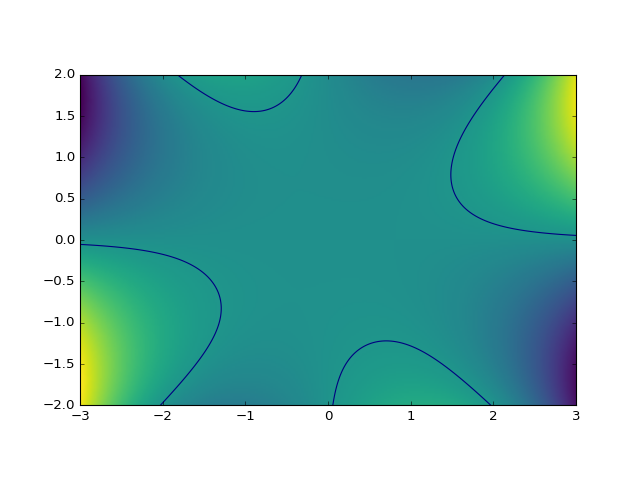

In [6]:
plt.imshow(Z2, origin='lower', cmap=cm.viridis, extent=(-3, 3, -2, 2))
plt.contour(X, Y, Z2, levels)
plt.savefig('curva0f2.pdf')

<IPython.core.display.Javascript object>


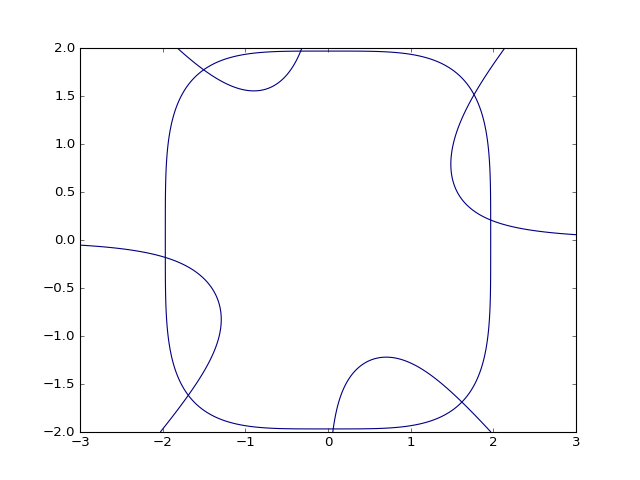

In [8]:
plt.contour(X, Y, Z1, levels)
plt.contour(X, Y, Z2, levels)
plt.savefig('interseccioncurvas.pdf')

<IPython.core.display.Javascript object>


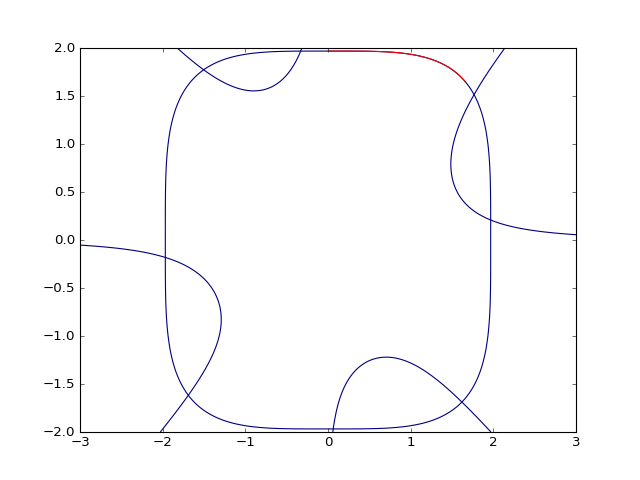

In [35]:
plt.contour(X, Y, Z1, levels)
plt.contour(X, Y, Z2, levels)
t = sp.linspace(0, 1*sp.pi/4, 100)
x = sp.sign(sp.sin(t)) * sp.power(sp.sin(t)**2, 1./4.)*1.9679896712654303
y = sp.sign(sp.cos(t)) * sp.power(sp.cos(t)**2, 1./4.)*1.9679896712654303
plt.plot(x, y, 'r')
plt.xlim(-3, 3)
plt.ylim(-2, 2)
#plt.savefig('contour1.pdf')

plt.show()

In [9]:
sp.power(15,1./4.)

1.9679896712654303

$x(t) \propto \text{sgn}(\sin(t))\sqrt[4]{\sin^{2}(t)}$

Se hace un simil con una circunferencia, por simetrias del problema se infiere que 

$y(t) \propto \text{sgn}(\cos(t))\sqrt[4]{\cos^{2}(t)}$

Viendo la interseccion de los contornos se infiere que los ceros de $F_2$ deben estar separados por $\frac{\pi}{4}$ aproximadamente, es decir, el primero esta cerca de $\frac{\pi}{4}$ el segundo de $\frac{\pi}{2}$, el tercero de $\frac{3\pi}{4}$ etc

In [10]:
F2(sp.sign(sp.sin(3*sp.pi/4)) * sp.power(sp.sin(3*sp.pi/4)**2, 1./4.)*1.9679896712654303, sp.sign(sp.cos(3*sp.pi/4)) * sp.power(sp.cos(3*sp.pi/4)**2, 1./4.)*1.9679896712654303)

-0.63656227008828359

In [11]:
def F2_reducida(t):
    RRR = 1.464
    x = sp.sign(sp.sin(t)) * sp.power(sp.sin(t)**2, 1./4.)*1.9679896712654303
    y = sp.sign(sp.cos(t)) * sp.power(sp.cos(t)**2, 1./4.)*1.9679896712654303
    res = x**3*y +- x*y**3 - y/2. - RRR
    return res

In [12]:
F2_reducida(3*sp.pi/4+.5)

4.7859326635743429

In [13]:
pi = sp.pi
posibles_ceros = [pi/4, pi/2, 3*pi/4+.5, pi-.5, 5*pi/4+.5, 3*pi/2-.5, 7*pi/4+.5, 2*pi-.5]
F2_reducida(posibles_ceros)

array([-2.29143773, -1.46399989,  4.78593266,  3.33171637,  4.34415534,
        3.09123969,  2.85815681,  1.48811591])

In [14]:
def F_reducida(t):
    x = sp.sign(sp.sin(t)) * sp.power(sp.sin(t)**2, 1./4.)*1.9679896712654303
    y = sp.sign(sp.cos(t)) * sp.power(sp.cos(t)**2, 1./4.)*1.9679896712654303
    res = x**4 + y**4 - 15
    return res

In [15]:
def encuentra_ceros():
    tol = 1e-20
    pi = sp.pi
    posibles_ceros = [pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4, 2*pi]
    delta = [.5, -.5]
    pares = []
    for t in posibles_ceros:
        if F2_reducida(t)*F2_reducida(t+delta[0])<0:
            t_0 = opt.bisect(F2_reducida, t, t+delta[0], xtol=tol)
        else:
            t_0 = opt.bisect(F2_reducida, t, t+delta[1], xtol=tol)
        x = sp.sign(sp.sin(t_0)) * sp.power(sp.sin(t_0)**2, 1./4.)*1.9679896712654303
        y = sp.sign(sp.cos(t_0)) * sp.power(sp.cos(t_0)**2, 1./4.)*1.9679896712654303
        pares.append((x, y))
    return pares
            

In [20]:
opt.bisect(F2_reducida, pi/4, pi/4+.5, xtol=1e-20)

0.9375716170244175

In [21]:
F2_reducida(0.9375716170244175)

-3.3306690738754696e-15

In [22]:
encuentra_ceros()

[(1.7669473251533254, 1.5138783340135835),
 (1.9679281913239208, 0.20807043855682616),
 (1.6195315294277728, -1.6880897500097491),
 (0.063041119148445249, -1.9679891532205411),
 (-1.6899275421855853, -1.6174428867372699),
 (-1.9679539076104238, -0.18171451675948014),
 (-1.5040652893171853, 1.7730278324283797),
 (-0.33068189913134088, 1.9675973488473744)]

In [33]:
F2(-0.33068189913134088, 1.9675973488473744)

1.234568003383174e-13

In [18]:
F1(1.9679281913239208, 0.20807043855682616)

-7.105427357601002e-15

<IPython.core.display.Javascript object>


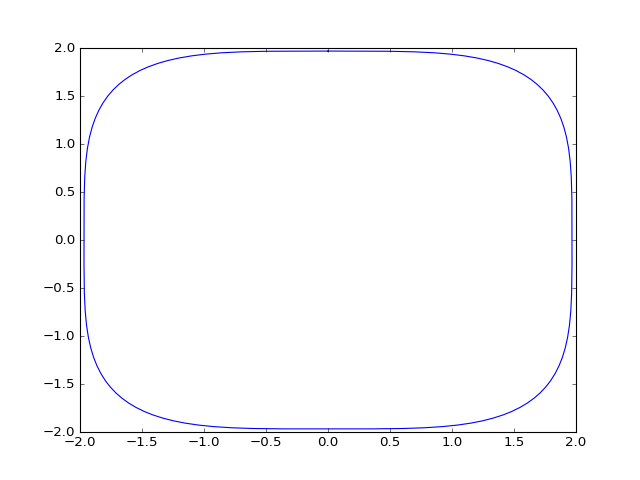

In [42]:
plt.plot(x,y)